In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from matplotlib import patches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EmpiricalCovariance, MinCovDet

In [2]:
data_path = #Put path to file here
df_covid = pd.read_csv(data_path)

In [3]:
df_covid.corr()

,ID,AGE,DAYS_HOSPITAL,DAYS_ICU,TEMP,HEART_RATE,GLUCOSE,SAT_O2,BLOOD_PRES_SYS,BLOOD_PRES_DIAS
ID,1.000000,0.971008,0.045893,-0.026443,0.019258,-0.058819,-0.006939,0.027066,0.114738,0.049670
AGE,0.971008,1.000000,0.042024,-0.032083,0.016667,-0.063651,0.003039,0.028598,0.114245,0.052333
DAYS_HOSPITAL,0.045893,0.042024,1.000000,0.348364,-0.038066,-0.026610,-0.014042,-0.058222,-0.000978,0.008937
DAYS_ICU,-0.026443,-0.032083,0.348364,1.000000,-0.057480,-0.036581,-0.011728,-0.083945,-0.028983,-0.024658
TEMP,0.019258,0.016667,-0.038066,-0.057480,1.000000,0.742506,0.032950,0.841005,0.531313,0.473725
HEART_RATE,-0.058819,-0.063651,-0.026610,-0.036581,0.742506,1.000000,0.028040,0.789945,0.524052,0.485434
GLUCOSE,-0.006939,0.003039,-0.014042,-0.011728,0.032950,0.028040,1.000000,0.036247,0.039495,0.025423
SAT_O2,0.027066,0.028598,-0.058222,-0.083945,0.841005,0.789945,0.036247,1.000000,0.558156,0.495471
BLOOD_PRES_SYS,0.114738,0.114245,-0.000978,-0.028983,0.531313,0.524052,0.039495,0.558156,1.000000,0.813789
BLOOD_PRES_DIAS,0.049670,0.052333,0.008937,-0.024658,0.473725,0.485434,0.025423,0.495471,0.813789,1.000000


In [4]:
df_covid['EXITUS'].value_counts()

NO     1684
YES     329
Name: EXITUS, dtype: int64

In [5]:
df_covid.describe()

,ID,AGE,DAYS_HOSPITAL,DAYS_ICU,TEMP,HEART_RATE,GLUCOSE,SAT_O2,BLOOD_PRES_SYS,BLOOD_PRES_DIAS
count,2054.000000,2050.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,1027.500000,70.856585,8.118793,0.355404,28.386319,70.787731,1.776047,73.397760,83.571568,48.328140
std,593.083046,20.456931,6.177872,2.173721,15.419158,41.802038,20.434622,37.863716,67.450853,44.225438
min,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,514.250000,57.000000,4.000000,0.000000,35.400000,63.000000,0.000000,81.000000,0.000000,0.000000
50%,1027.500000,68.000000,7.000000,0.000000,36.400000,84.000000,0.000000,93.000000,115.000000,64.000000
75%,1540.750000,98.000000,10.000000,0.000000,36.900000,98.000000,0.000000,96.000000,137.000000,79.000000
max,2054.000000,189.000000,98.000000,36.000000,40.100000,593.000000,448.000000,99.000000,772.000000,845.000000


In [6]:
df_covid.isna().sum()

ID                    0
AGE                   4
SEX                   2
DAYS_HOSPITAL         0
DAYS_ICU              0
EXITUS               41
DESTINATION        1383
TEMP                  0
HEART_RATE            0
GLUCOSE               0
SAT_O2                0
BLOOD_PRES_SYS        0
BLOOD_PRES_DIAS       0
dtype: int64

In [7]:
labels = ["AGE", "DAYS_HOSPITAL", "DAYS_ICU", "TEMP", "HEART_RATE", "GLUCOSE", "SAT_O2", "BLOOD_PRES_SYS", "BLOOD_PRES_DIAS"]
data = df_covid[["AGE","DAYS_HOSPITAL","DAYS_ICU","TEMP","HEART_RATE","GLUCOSE","SAT_O2","BLOOD_PRES_SYS","BLOOD_PRES_DIAS"]]

In [8]:
# Data is dropped to plot boxplots since we have little data i suggest not using the destination column
data = data.dropna()

<string>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


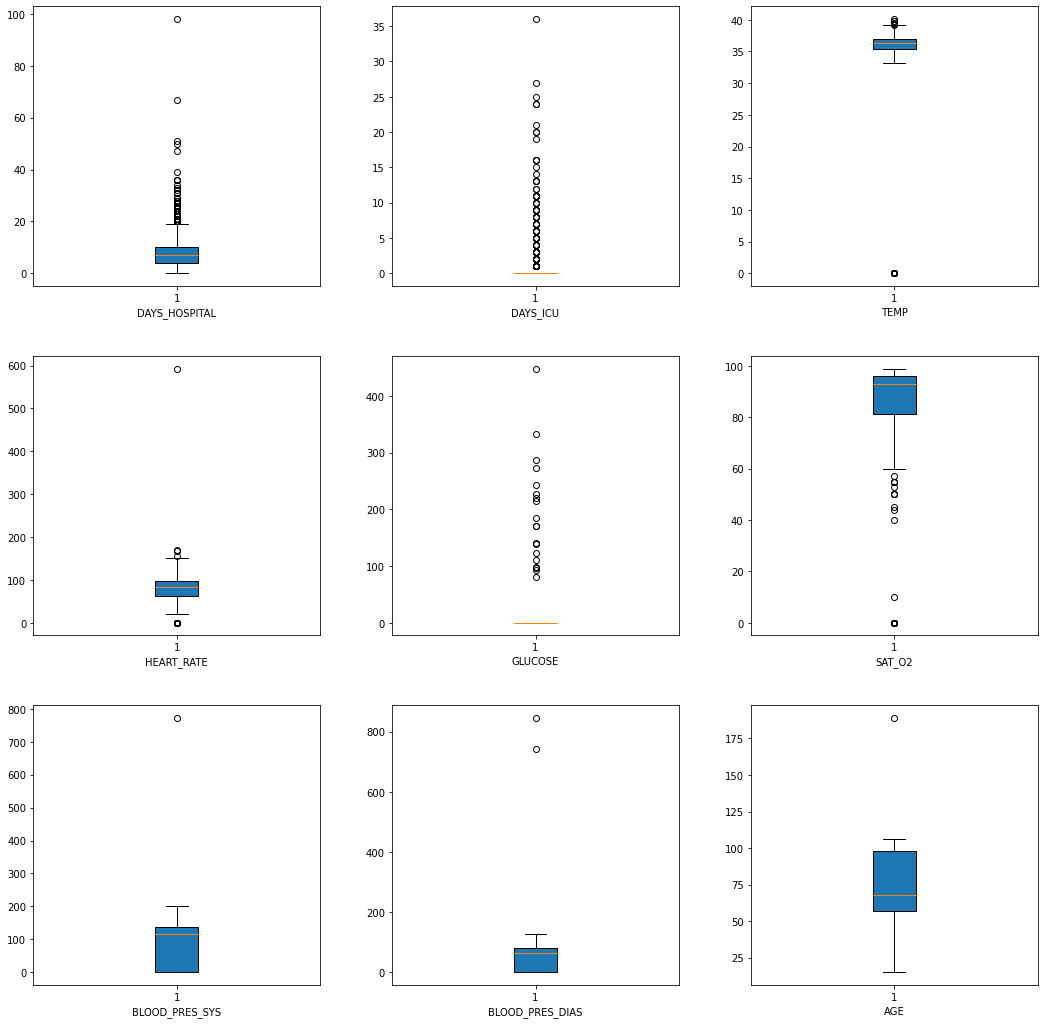

In [9]:
fig = plt.figure(figsize=(18, 18))
plt.title("Outlier Detection")
rows = 3
columns = 3

grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .25)

for i in range(rows*columns+1):
    plt.boxplot(data.iloc[:, i-1].to_numpy(), vert= True, patch_artist=True)
    plt.xlabel(labels[i-1])
   

    exec (f"plt.subplot(grid{[i-1]})")


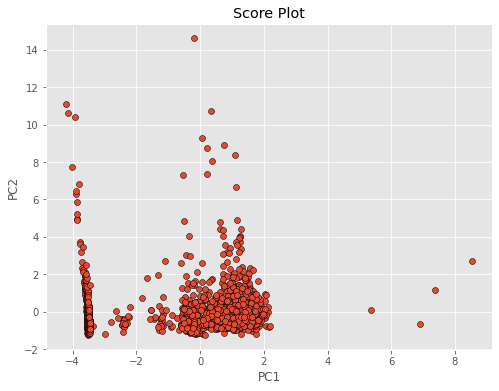

In [10]:
pca = PCA()
# Run PCA on scaled data and obtain the scores array
T = pca.fit_transform(StandardScaler().fit_transform(data))
 
# Score plot of the first 2 PC
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(T[:, 0], T[:, 1], edgecolors='k', cmap='jet')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')
plt.show()

In [11]:
# fit a Minimum Covariance Determinant (MCD) robust estimator to data 
robust_cov = MinCovDet().fit(T[:,:5])
 
# Get the Mahalanobis distance
m = robust_cov.mahalanobis(T[:,:5])

In [12]:
data['mahalanobis'] = m

In [13]:
data['P'] = 1 - chi2.cdf(data['mahalanobis'], 3)

In [14]:
data.loc[data['P'] < 0.01]

,AGE,DAYS_HOSPITAL,DAYS_ICU,TEMP,HEART_RATE,GLUCOSE,SAT_O2,BLOOD_PRES_SYS,BLOOD_PRES_DIAS,mahalanobis,P
0,15.0,4,0,37.0,0,0,92,0,0,77.747160,1.110223e-16
1,18.0,4,0,37.3,105,0,97,0,0,58.400861,1.290634e-12
2,21.0,7,0,38.5,112,0,95,85,47,15.150309,1.692602e-03
3,21.0,10,0,39.2,113,0,97,0,0,60.666669,4.234391e-13
6,23.0,5,0,0.0,0,0,0,0,0,439.082945,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
2039,99.0,3,0,0.0,90,0,92,0,0,92.567691,0.000000e+00
2040,99.0,3,0,36.3,90,0,94,0,0,54.257572,9.887424e-12
2042,99.0,4,0,0.0,0,0,0,0,0,407.019461,0.000000e+00
2043,100.0,3,0,36.6,70,0,94,0,0,51.851034,3.222222e-11
